In [1]:
from dolfin import *
%matplotlib inline

In [6]:
# Load mesh and subdomains
mesh = Mesh("dolfin_fine.xml.gz")
sub_domains = MeshFunction("size_t", mesh, "dolfin_fine_subdomains.xml.gz")

# Define function spaces
P2 = VectorElement("Lagrange", mesh.ufl_cell(), 2)  # V_u for u and v
P1 = FiniteElement("Lagrange", mesh.ufl_cell(), 1)  # V_q for p
TH = P2 * P1
W = FunctionSpace(mesh, TH)

# No-slip boundary condition for velocity
# x1 = 0, x1 = 1 and around the dolphin
noslip = Constant((0, 0))
bc0 = DirichletBC(W.sub(0), noslip, sub_domains, 0)

# Inflow boundary condition for velocity
# x0 = 1
inflow = Expression(("-sin(x[1]*pi)", "0.0"), degree=2)
bc1 = DirichletBC(W.sub(0), inflow, sub_domains, 1)

# Collect boundary conditions
bcs = [bc0, bc1]

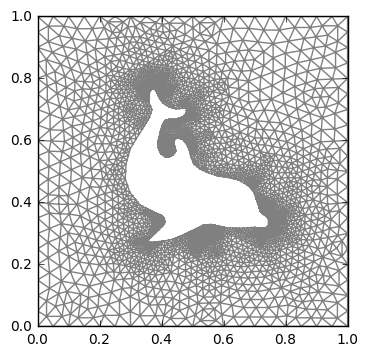

In [7]:
plot(mesh)

In [8]:
# Define variational problem
(u, p) = TrialFunctions(W)
(v, q) = TestFunctions(W)
f = Constant((0, 0))
a = (inner(grad(u), grad(v)) - div(v)*p + q*div(u))*dx
L = inner(f, v)*dx

# Compute solution
w = Function(W)
solve(a == L, w, bcs)

# Split the mixed solution using deepcopy
# (needed for further computation on coefficient vector)
(u, p) = w.split(True)

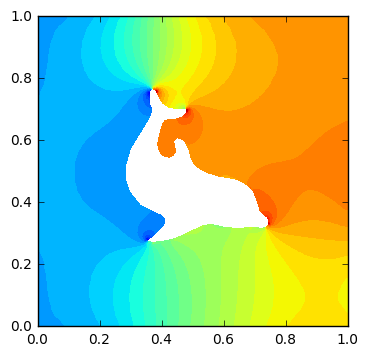

In [9]:
# # Split the mixed solution using a shallow copy
(u, p) = w.split()

# Save solution in VTK format
ufile_pvd = File("velocity.pvd")
ufile_pvd << u
pfile_pvd = File("pressure.pvd")
pfile_pvd << p

# Plot solution
#plot(u)
plot(p)
interactive()